# Project 1 Revisited - Part 2: Global Explanations

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

## Load Your Saved Joblib File

In [2]:
loaded = joblib.load('bestmodels.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'DecisionTreeRegressor'])

In [3]:
X_train = loaded['X_train']
X_test = loaded['X_test']
y_train = loaded['y_train']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
lin_reg_final = loaded['LinearRegression']
dec_tree = loaded['DecisionTreeRegressor']

## Explain your tree-based model with shap:

In [4]:
import shap
shap.initjs()

In [5]:
len(X_train)

6392

In [6]:
X_shap = shap.sample(X_train,nsamples = 6392,random_state=42)
y_shap = y_train.loc[X_shap.index]
X_shap.head()

Outlet_Type  Outlet_Size  Outlet_Location_Type  \
4776          2.0          1.0                   2.0   
7510          2.0          1.0                   2.0   
5828          1.0          1.0                   0.0   
5327          1.0          0.0                   1.0   
4810          1.0          1.0                   1.0   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
4776                       1.0                       0.0   
7510                       0.0                       1.0   
5828                       0.0                       1.0   
5327                       1.0                       0.0   
4810                       1.0                       0.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
4776                     0.0               0.0                  0.0   
7510                     0.0               0.0                  0.0   
5828                     0.0               0.0                  0.0   
5327                     1.0               0.0                  0.0   
4810                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  ...  Outlet_Establishment_Year_1997  \
4776               0.0              0.0  ...                             0.0   
7510               0.0              0.0  ...                             0.0   
5828               0.0              0.0  ...                             0.0   
5327               0.0              0.0  ...                             0.0   
4810               0.0              0.0  ...                             0.0   

      Outlet_Establishment_Year_1998  Outlet_Establishment_Year_1999  \
4776                             0.0                             0.0   
7510                             0.0                             0.0   
5828                             0.0                             1.0   
5327                             0.0                             0.0   
4810                             0.0                             0.0   

      Outlet_Establishment_Year_2002  Outlet_Establishment_Year_2004  \
4776                             0.0                             0.0   
7510                             0.0                             0.0   
5828                             0.0                             0.0   
5327                             0.0                             1.0   
4810                             1.0                             0.0   

      Outlet_Establishment_Year_2007  Outlet_Establishment_Year_2009  \
4776                             0.0                             1.0   
7510                             0.0                             1.0   
5828                             0.0                             0.0   
5327                             0.0                             0.0   
4810                             0.0                             0.0   

      Item_Weight  Item_Visibility  Item_MRP  
4776       16.350         0.029565  256.4646  
7510       15.250         0.000000  179.7660  
5828       12.350         0.158716  157.2946  
5327        7.975         0.014628   82.3250  
4810       19.350         0.016645  120.9098  

[5 rows x 43 columns]

In [7]:
explainer = shap.Explainer(dec_tree)
explainer

In [8]:
shap_values = explainer(X_shap, y_shap)
type(shap_values)

shap._explanation.Explanation

In [9]:
shap_values.shape

(6392, 43)

In [10]:
shap_values[0]

.values =
array([-7.45739712e+02, -1.65874007e+01, -6.24667539e+01,  9.78162117e+00,
       -9.32414434e+00, -5.53063161e+00, -1.90841600e+00, -2.44890199e-01,
       -6.01140901e+00, -4.16790655e+00, -1.89996849e+00, -2.30197280e+01,
       -2.08777597e+00, -9.89459276e-01, -6.70158167e+02, -1.85713418e+00,
       -8.29823154e-01, -7.14506062e-01, -1.44589614e+01,  2.49408650e+00,
        7.78402792e+00,  2.44273864e-02, -1.39644035e+00, -8.99948289e+00,
       -1.75558285e+01, -3.85659512e-02, -2.06025986e+01, -4.42941183e-01,
        2.35603308e+00, -9.86091296e-01, -3.16034481e+00, -2.60422204e+02,
       -2.56346107e+00,  3.44986977e+00,  5.24105992e-03, -2.59780367e+00,
       -2.17580774e+00, -5.37481974e+00, -3.14425592e+00, -2.46593590e+01,
       -4.18908365e+02, -1.94779790e+02,  8.15259483e+02])

.base_values =
array([2209.9793572])

.data =
array([2.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,


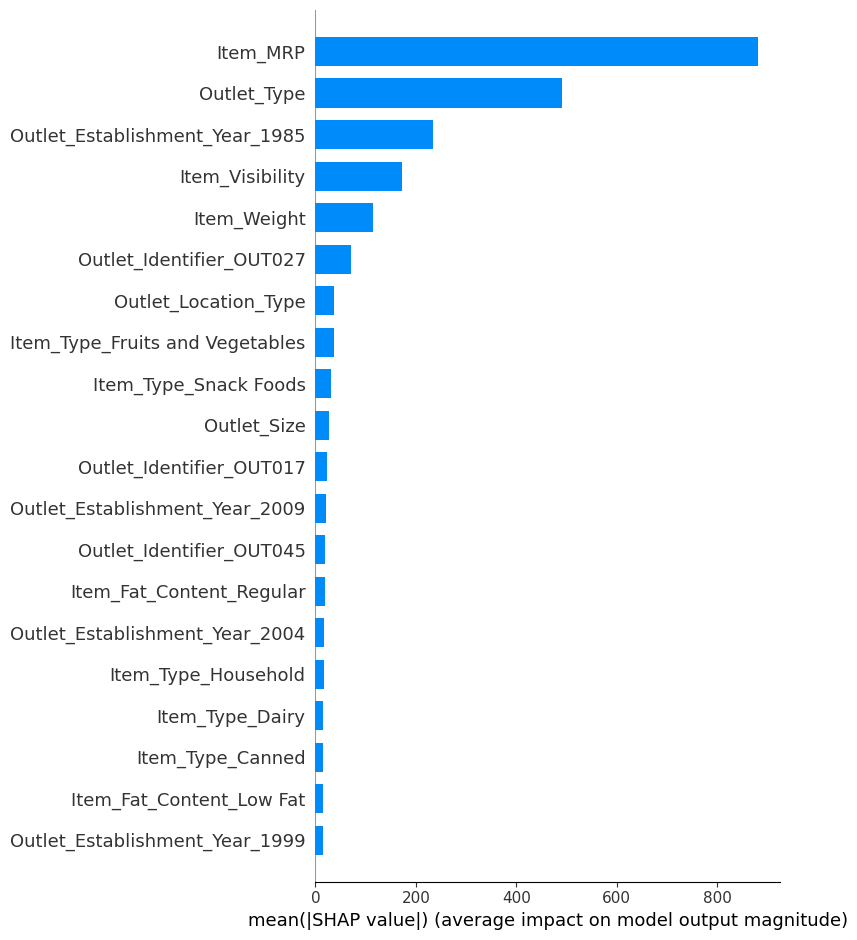

In [11]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features = X_shap, plot_type='bar')

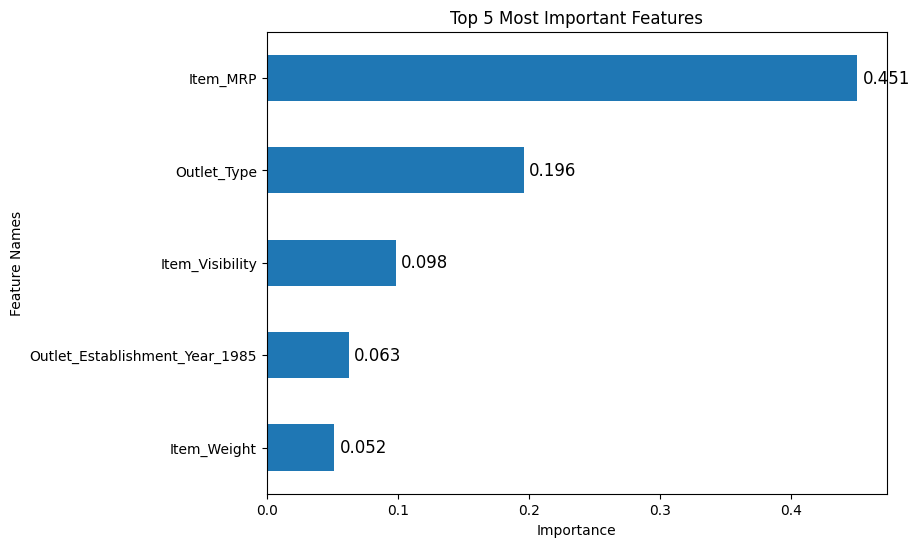

Both graphs are similar in the top 5 except for the graphs switching Outlet establishment year 1985 with Item Visibility

In [12]:
fig.savefig('Images/DecTree_SHAP_Bar.png', bbox_inches = 'tight')

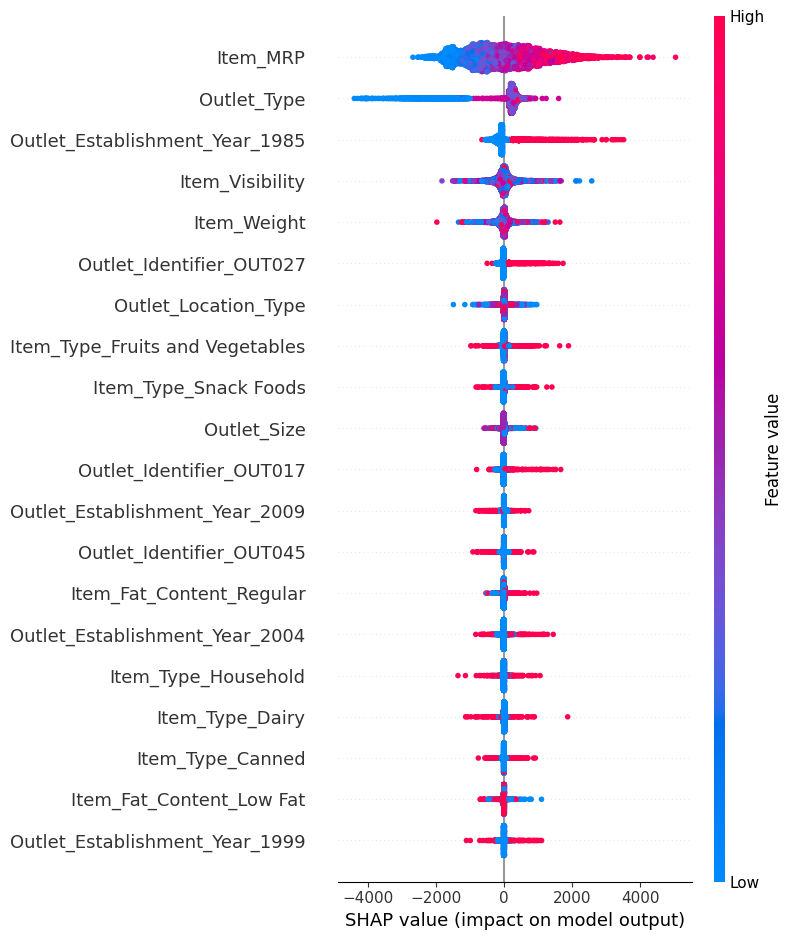

In [13]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features = X_shap)

In [14]:
fig.savefig('Images/DecTree_SHAP_Dot.png', bbox_inches = 'tight')

The top 3 features are Item MRP, Outlet Type, and Outlet establishment year 1985 with Item MRP having the most positive impact to Item Sales while Outlet Type is the opposite.

# Local Explanations

I chose the target Item Sales for my high and low examples.

In [15]:
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

X_shap_local

Outlet_Type  Outlet_Size  Outlet_Location_Type  \
0             2.0          1.0                   2.0   
1             2.0          1.0                   2.0   
2             1.0          1.0                   0.0   
3             1.0          0.0                   1.0   
4             1.0          1.0                   1.0   
...           ...          ...                   ...   
6387          0.0          1.0                   2.0   
6388          1.0          1.0                   1.0   
6389          1.0          1.0                   1.0   
6390          1.0          1.0                   1.0   
6391          1.0          0.0                   0.0   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                          1.0                       0.0   
1                          0.0                       1.0   
2                          0.0                       1.0   
3                          1.0                       0.0   
4                          1.0                       0.0   
...                        ...                       ...   
6387                       0.0                       1.0   
6388                       1.0                       0.0   
6389                       1.0                       0.0   
6390                       1.0                       0.0   
6391                       1.0                       0.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                        0.0               0.0                  0.0   
1                        0.0               0.0                  0.0   
2                        0.0               0.0                  0.0   
3                        1.0               0.0                  0.0   
4                        0.0               0.0                  0.0   
...                      ...               ...                  ...   
6387                     0.0               0.0                  0.0   
6388                     0.0               0.0                  0.0   
6389                     0.0               0.0                  0.0   
6390                     0.0               0.0                  0.0   
6391                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  ...  Outlet_Establishment_Year_1997  \
0                  0.0              0.0  ...                             0.0   
1                  0.0              0.0  ...                             0.0   
2                  0.0              0.0  ...                             0.0   
3                  0.0              0.0  ...                             0.0   
4                  0.0              0.0  ...                             0.0   
...                ...              ...  ...                             ...   
6387               0.0              0.0  ...                             0.0   
6388               0.0              0.0  ...                             0.0   
6389               0.0              0.0  ...                             0.0   
6390               0.0              0.0  ...                             0.0   
6391               0.0              0.0  ...                             1.0   

      Outlet_Establishment_Year_1998  Outlet_Establishment_Year_1999  \
0                                0.0                             0.0   
1                                0.0                             0.0   
2                                0.0                             1.0   
3                                0.0                             0.0   
4                                0.0                             0.0   
...                              ...                             ...   
6387                             1.0                             0.0   
6388                             0.0                             0.0   
6389                             0.0                             0.0   
6390                             0.0                             0.0   
6391  

In [16]:
y_shap_local

0        515.3292
1       3056.0220
2       1577.9460
3       1331.6000
4       1687.1372
          ...    
6387     280.9676
6388    1301.6390
6389    6145.3340
6390    1649.8524
6391     965.4100
Name: Item_Outlet_Sales, Length: 6392, dtype: float64

In [17]:
y_shap_local.describe()

count     6392.000000
mean      2209.979357
std       1720.441446
min         33.290000
25%        856.884600
50%       1808.978600
75%       3136.250900
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [18]:
item_high_sale = y_shap_local.max()
item_high_sale

13086.9648

In [19]:
item_low_sale = y_shap_local.min()
item_low_sale

33.29

##  Lime tabular explanation

In [20]:
from lime.lime_tabular import LimeTabularExplainer

lime_explainer =LimeTabularExplainer(
    training_data=X_shap_local.values,  
    feature_names=X_shap_local.columns,
   mode='regression')

lime_explainer

In [21]:
index = y_shap_local.index[y_shap_local == item_high_sale].tolist()
print(f'Index: {index}')

Index: [4647]


In [22]:
exp = lime_explainer.explain_instance(X_shap_local.loc[4647],dec_tree.predict)
exp.show_in_notebook()

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


This example row is the max item_sales row and these are the features that led to that value.

These are the top positives:

Item_MRP: 235
This feature is the largest positive value and has led to an increase in sales by 1658.9 rupees.

Outlet Establishment Year 1985: 1
This feature is the 2nd highest positive and we can assume the outlet is reputable and sales good items with sales of 983.34

Outlet Type: 3
This feature is the 3rd highest positive feauture with an increase in sales of 628 rupees. This type of store seems to be a profitable one.

These are the top negatives:

Item Type Breakfast and Item Type Meats are the 2 highest negatives with breakfast being a negative 348 and 234 respectively. One can assume this shop or these customers are not high on breakfast and meat and don't consume a lot of either one.

In [23]:
index = y_shap_local.index[y_shap_local == item_low_sale].tolist()
print(f'Index: {index}')

Index: [4448]


In [24]:
exp = lime_explainer.explain_instance(X_shap_local.loc[4448],
                                      dec_tree.predict)
exp.show_in_notebook()

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


This example row is the min item_sales row and these are the features that led to that value.

These are the top negatives:

Item_MRP: 32.89
This feature is the largest negative value and has led to an decrease in sales by 626.67 rupees.

Outlet Establishment Year 1985: 0
This feature is the 2nd highest negative and must not be a popular store because it has a negative 959.39.

Outlet Type: 0
This feature is the 3rd highest negative feauture and is the least popular type of the store and has led to a decrease of 483.43 rupees.

##  Individual Force Plot

In [25]:
shap.initjs()

In [26]:
i = 4647
single_X = X_shap_local.iloc[i]
single_y = y_shap_local.iloc[i]
single_shap_vals = shap_values[i]
single_X.head(10)

Outlet_Type                 3.0
Outlet_Size                 1.0
Outlet_Location_Type        2.0
Item_Fat_Content_Low Fat    1.0
Item_Fat_Content_Regular    0.0
Item_Type_Baking Goods      0.0
Item_Type_Breads            0.0
Item_Type_Breakfast         0.0
Item_Type_Canned            0.0
Item_Type_Dairy             0.0
Name: 4647, dtype: float64

In [27]:
single_y

13086.9648

In [28]:
shap.force_plot(explainer.expected_value[0],shap_values = single_shap_vals.values,
               features = single_X)

- Base value is 2,210
- The shap value is 13,086.96
- The red features show that this is a great push towards higher sales 
- Item MRP is the most important feature with a value of 235 rupees.
- Outlet Type=3, Outlet Establishment Year 1985=1, and Item Visibilty= 0.01055 are also important values that lead to higher revenue.

In [29]:
i = 4448
single_X = X_shap.iloc[i]
single_y = y_shap.iloc[i]
single_shap_vals = shap_values[i]
single_X.head()

Outlet_Type                 0.0
Outlet_Size                 1.0
Outlet_Location_Type        2.0
Item_Fat_Content_Low Fat    1.0
Item_Fat_Content_Regular    0.0
Name: 906, dtype: float64

In [30]:
single_y

33.29

In [31]:
shap.force_plot(explainer.expected_value[0],shap_values = single_shap_vals.values,
               features = single_X)

- Base value is 2,210
- The shap value is 33.29
- The blue features show that this is a great push towards lower sales 
- Item MRP is still the most important feature but this time with a value of 32.89 rupees.
- The only other feature listed is Outlet Type= 0 which is shown to be the least profitable outlet type there is in this data.